# CC3001 Algoritmos y Estructuras de Datos

**Profesores: Nelson Baloian, Benjamín Bustos, Sebastian Ferrada, Patricio Poblete <br>
Auxiliares: Sebastián Acuña, Valentina Aravena, Vicente Olivares, Ricardo Valdivia<br>
Estudiante: Ignacio Romero Aravena <br>
Fecha: 25/09/2023**</br>

### Ejercicio 4.4

Suponga que por un accidente, o quizás por vandalismo, todos los punteros ``prev`` de una lista de doble enlace han sido destruidos. Afortunadamente, los punteros ``sgte`` están intactos. Usted debe escribir primero una función que pueda invocarse como ``L.destruye_prev()`` que remueva todos los punteros ``prev`` de los nodos. Para lograr esto hay que hacer que todos los punteros ``prev`` apunten a la cabecera. A continuación, debe escribir una función que pueda invocarse como ``L.repara_prev`` que reconstruya los punteros faltantes. A continuación se encuentra la definición de la clase ``Lista_doble_enlace`` incluyendo las cabeceras de las funciones ``destruye_prev`` y ``repara_prev`` que usted debe completar. También se entrega un caso de prueba para probar que sus funciones son correctas.

In [1]:
!pip install aed_utilities

import aed_utilities as aed

class Nodo:
    def __init__(self, prev, info, sgte):
        self.prev=prev
        self.info=info
        self.sgte=sgte

class Lista_doble_enlace:
    def __init__(self):
        self.cabecera=Nodo(None,0,None)
        self.cabecera.prev=self.cabecera
        self.cabecera.sgte=self.cabecera

    def insertar_despues_de(self,p,info): # inserta después de nodo p
        r=p.sgte
        p.sgte=r.prev=Nodo(p,info,r)

    def eliminar(self,p): # elimina el nodo p
        assert p is not self.cabecera
        (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)

    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is self.cabecera:
                return None
            j+=1

    def ascendente(self):
        p=self.cabecera.sgte
        while p is not self.cabecera:
            yield p.info
            p=p.sgte

    def descendente(self):
        p=self.cabecera.prev
        while p is not self.cabecera:
              yield p.info
              p=p.prev

    def destruye_prev(self):
    #Define aquí la función para destruir los enlaces "prev"
      p = self.cabecera.sgte
      while p is not self.cabecera:
            p.prev = p.sgte  #Apunta todos los enlaces previos al siguiente, "destruyéndolos"
            p = p.sgte


    def repara_prev(self):
    #Define aquí la función para reparar los enlaces "prev"
      p = self.cabecera
      while p.sgte is not self.cabecera: #Partimos de self.cabecera.sgte
            p.sgte.prev = p #Apuntamos al anterior
            p = p.sgte


    def dibujar(self):
      lld=aed.LinkedListDrawer(fieldHeader="cabecera", fieldData="info", fieldLink="sgte", fieldReverseLink="prev")
      lld.draw_double_linked_list(self)

Pruébela a continuación:

[42, 65, 13, 44]


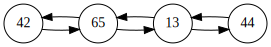

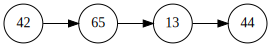

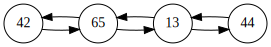

In [2]:
L=Lista_doble_enlace()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)

print([x for x in L.ascendente()]) #Printea la lista original

L.dibujar() #Muestra la lista doblemente enlazada original


L.destruye_prev()

L.dibujar() #Muestra la lista como si fuera una lista enlazada simple (sin enlaces "prev")

L.repara_prev()
L.dibujar() #Muestra la lista con los enlaces "prev" reparados